In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import keras
import os
import time
import tensorflow as tf
import glob
import PIL
from keras.layers import Conv2DTranspose
from IPython import display

# Generator

In [5]:
def make_generator():
    model = tf.keras.Sequential()

    model.add(layers.Dense(4 * 4 * 256, input_shape=(100,)))
    model.add(layers.Reshape((4, 4, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh'))

    return model

In [6]:
generator = make_generator()

e:\Code\GOIT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
generator.load_weights('E:\\Code\\GOIT\\DCGAN\\models\\generator_weights.h5')

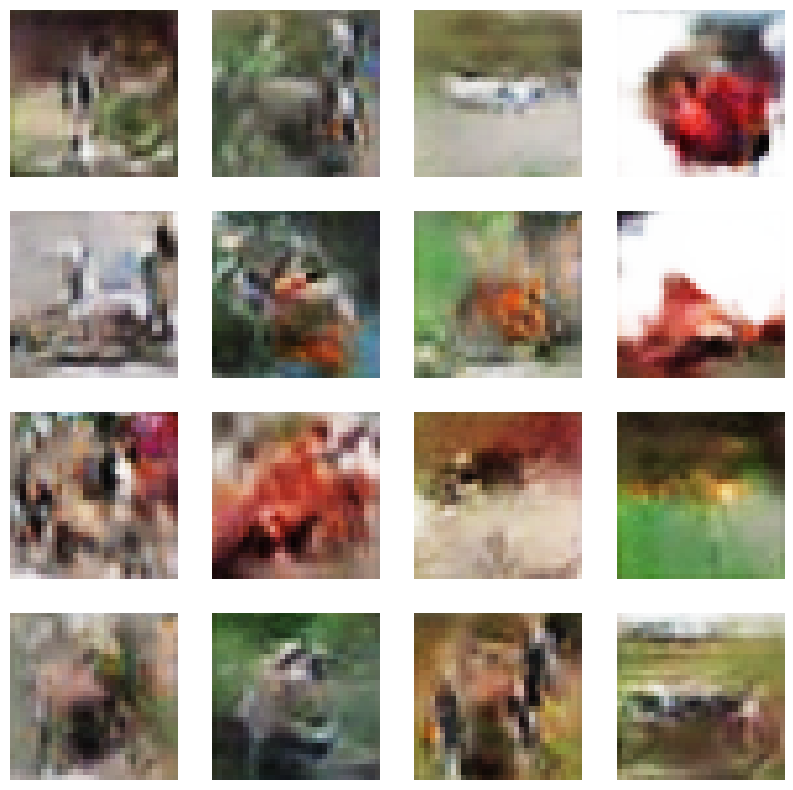

In [8]:
predictions = generator(tf.random.normal([16, 100]), training=False)

plt.figure(figsize=(10, 10))
for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    img_array = (predictions[i].numpy() * 127.5 + 127.5).astype(np.uint8)
    plt.imshow(img_array)
    plt.axis('off')
plt.show()

# Discriminator

In [9]:
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [10]:
discriminator = make_discriminator()

e:\Code\GOIT\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
discriminator.load_weights('E:\\Code\\GOIT\\DCGAN\\models\\discriminator_weights.h5')

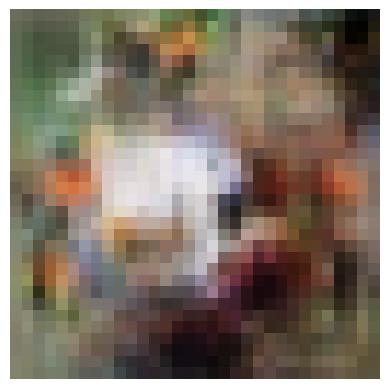

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.12403367]], dtype=float32)>

In [18]:
generated_image = generator(tf.random.normal([1, 100]), training=False)
img_array = (generated_image[0].numpy() * 127.5 + 127.5).astype(np.uint8)
plt.imshow(img_array)
plt.axis('off')
plt.show()
discriminator(generated_image, training=False)